Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization_3 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               5

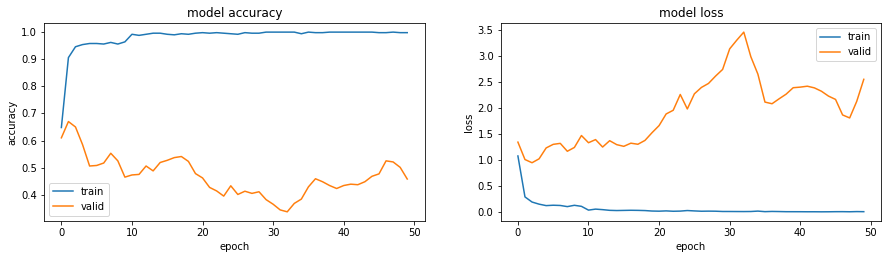

In [2]:
#########################
from google.colab import drive
drive.mount('/content/drive')
print('')

#########################
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

#########################
data_dir = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train'

num_classes = 10
channels = 3
img_size = 224

resnet50_pooling = 'avg'
resnet50_weight = 'imagenet'
dense_layer_activation = 'softmax'
objective_function = 'categorical_crossentropy'
loss_metrics = ['accuracy']

learning_rate = 0.001
beta_1=0.9
beta_2=0.999

num_epochs = 50
early_stop_patience = 3
steps_per_epochs_training = 10
steps_per_epochs_validation = 10

batch_size_training = 50
batch_size_validation = 50
batch_size_testing = 1

#########################
model = Sequential()
model.add(ResNet50(include_top = False, pooling = resnet50_pooling, weights = resnet50_weight, input_shape=(img_size, img_size, channels)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation = dense_layer_activation))

model.layers[0].trainable = False

adam = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2)
model.compile(optimizer = adam, loss = objective_function, metrics = loss_metrics)

model.summary()
print('')

##########################
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size_training,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size_validation,
    class_mode='categorical',
    subset='validation')
print('')

##########################
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epochs_training,
        epochs = num_epochs,
        validation_data = validation_generator,
        validation_steps = 1000//batch_size_validation
)
print('')

##########################
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()